### Import Necessary Liabraries

In [98]:
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [101]:
# Load Train and Test Data
cTrain = np.loadtxt(r'train.csv')
cTrainLabels = np.loadtxt(r'trainlabel.csv').astype(int)
cTest = np.loadtxt(r'test.csv')
cTestLabels = np.loadtxt(r'testlabel.csv').astype(int)

In [102]:
# split train and validation data
p = int((len(cTrain)*0.8))

cTrain_p = cTrain[:p]
cVal = cTrain[p:]

cTrainLabels_p = cTrainLabels[:p]
cValLabels = cTrainLabels[p:]

print(len(cTrain_p), " ", len(cVal))

169   43


In [103]:
# Define dataloader with batch size
cTrain_dataloader = DataLoader(CustomDataset(cTrain_p, cTrainLabels_p), batch_size=32)
cVal_dataloader = DataLoader(CustomDataset(cVal, cValLabels), batch_size=32)
cTest_dataloader = DataLoader(CustomDataset(cTest, cTestLabels), batch_size=32)

### Build Sequential nn Model

In [154]:
class CNeuralNetwork(nn.Module):
    def __init__(self):
        super(CNeuralNetwork,self).__init__()
        self.flatten = nn.Flatten()
        self.model = nn.Sequential(
            nn.Linear(13, 26),
            nn.ReLU(),
            nn.Linear(26, 13),
            nn.Sigmoid(),
            nn.Linear(13,1),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        prediction = self.model(x)
        return prediction

In [155]:
cModel = CNeuralNetwork()
print(cModel)

CNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (model): Sequential(
    (0): Linear(in_features=13, out_features=26, bias=True)
    (1): ReLU()
    (2): Linear(in_features=26, out_features=13, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=13, out_features=1, bias=True)
  )
)


In [156]:
def cTraining(dataloader, model, loss_fn, optimizer):
    full_loss = 0
    correct = 0
    
    for (X, y) in dataloader:
        
        pred = model(X)
        yf = y.type(torch.FloatTensor)
        loss = loss_fn(pred, yf.unsqueeze(1)) # [32] -> [32, 1]
        full_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        correct += (torch.flatten((pred > 0).long()) == y).type(torch.float).sum().item()
    
    full_loss /= len(dataloader)
    correct /= len(dataloader.dataset)
    print("Training Loss ", full_loss)
    print("Training Accuracy ", correct)
    return full_loss, correct

In [157]:
def cTesting(dataloader, model, loss_fn):
    test_loss = 0
    correct = 0
    predLabels = []
    
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            yf = y.type(torch.FloatTensor)
            test_loss += loss_fn(pred, yf.unsqueeze(1)).item()
            correct += (torch.flatten((pred > 0).long()) == y).type(torch.float).sum().item()
            predLabels.append(torch.flatten((pred > 0).long()).tolist())
    
    test_loss /= len(dataloader)
    correct /= len(dataloader.dataset)
    print("Testing loss ", test_loss)
    print("Testing Accuracy ", correct)
    predLabels = list(np.concatenate(predLabels).flat)
    return test_loss, correct, predLabels

In [158]:
cModel = CNeuralNetwork()
cLoss_fn = nn.BCEWithLogitsLoss() #nn.BCELoss
cOptimizer = torch.optim.Adam(cModel.parameters())

cTrainingAcc = []
cTrainingLoss = []
cValidationAcc = []
cValidationLoss = []

for e in range(100):
    print("Epoch ", e+1, "\n-----------------------------------")
    cTLoss, cTAcc = cTraining(cTrain_dataloader, cModel, cLoss_fn, cOptimizer)
    cTrainingAcc.append(cTAcc)
    cTrainingLoss.append(cTLoss)
    cVLoss, cVAcc, x = cTesting(cVal_dataloader, cModel, cLoss_fn)
    cValidationAcc.append(cVAcc)
    cValidationLoss.append(cVLoss)
    print()
x, y, cPredLabels = cTesting(cTest_dataloader, cModel, cLoss_fn)

Epoch  1 
-----------------------------------
Training Loss  0.7043562233448029
Training Accuracy  0.5088757396449705
Testing loss  0.7496601939201355
Testing Accuracy  0.37209302325581395

Epoch  2 
-----------------------------------
Training Loss  0.6971265574296316
Training Accuracy  0.5088757396449705
Testing loss  0.7447157502174377
Testing Accuracy  0.37209302325581395

Epoch  3 
-----------------------------------
Training Loss  0.6956970989704132
Training Accuracy  0.5088757396449705
Testing loss  0.7407433092594147
Testing Accuracy  0.37209302325581395

Epoch  4 
-----------------------------------
Training Loss  0.693899542093277
Training Accuracy  0.5088757396449705
Testing loss  0.7387121021747589
Testing Accuracy  0.37209302325581395

Epoch  5 
-----------------------------------
Training Loss  0.6912179191907247
Training Accuracy  0.5088757396449705
Testing loss  0.7420603036880493
Testing Accuracy  0.37209302325581395

Epoch  6 
-----------------------------------
Train

Testing loss  0.6659067571163177
Testing Accuracy  0.6511627906976745

Epoch  45 
-----------------------------------
Training Loss  0.5976950526237488
Training Accuracy  0.6745562130177515
Testing loss  0.6642927527427673
Testing Accuracy  0.6511627906976745

Epoch  46 
-----------------------------------
Training Loss  0.5959221124649048
Training Accuracy  0.6804733727810651
Testing loss  0.6619099080562592
Testing Accuracy  0.6511627906976745

Epoch  47 
-----------------------------------
Training Loss  0.5940849979718527
Training Accuracy  0.6863905325443787
Testing loss  0.6598058044910431
Testing Accuracy  0.6511627906976745

Epoch  48 
-----------------------------------
Training Loss  0.5922208329041799
Training Accuracy  0.6923076923076923
Testing loss  0.6581402719020844
Testing Accuracy  0.6511627906976745

Epoch  49 
-----------------------------------
Training Loss  0.5903787811597189
Training Accuracy  0.6923076923076923
Testing loss  0.6560235321521759
Testing Accuracy 

Testing loss  0.5491821765899658
Testing Accuracy  0.8372093023255814

Epoch  91 
-----------------------------------
Training Loss  0.4923151582479477
Training Accuracy  0.8047337278106509
Testing loss  0.5598703026771545
Testing Accuracy  0.813953488372093

Epoch  92 
-----------------------------------
Training Loss  0.492250328262647
Training Accuracy  0.7928994082840237
Testing loss  0.5432814061641693
Testing Accuracy  0.8372093023255814

Epoch  93 
-----------------------------------
Training Loss  0.4877269168694814
Training Accuracy  0.8047337278106509
Testing loss  0.5450204908847809
Testing Accuracy  0.8372093023255814

Epoch  94 
-----------------------------------
Training Loss  0.48373475670814514
Training Accuracy  0.8047337278106509
Testing loss  0.5437052547931671
Testing Accuracy  0.8372093023255814

Epoch  95 
-----------------------------------
Training Loss  0.47751282155513763
Training Accuracy  0.8047337278106509
Testing loss  0.550000861287117
Testing Accuracy  

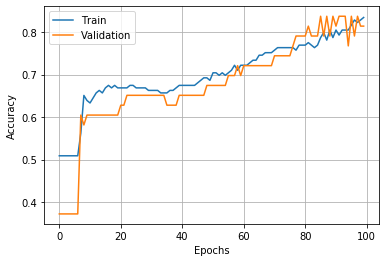

In [159]:
#Plot Accuracy
plt.plot(cTrainingAcc)
plt.plot(cValidationAcc)
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])

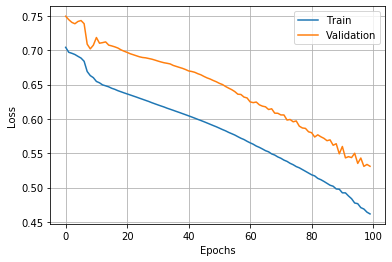

In [160]:
#Plot Loss
plt.plot(cTrainingLoss)
plt.plot(cValidationLoss)
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])

### Classification Report

In [161]:
print(classification_report(cTestLabels, cPredLabels))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78        36
           1       0.90      0.78      0.83        55

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.83      0.81      0.82        91



### Confusion Matrix

Text(33.0, 0.5, 'Truth')

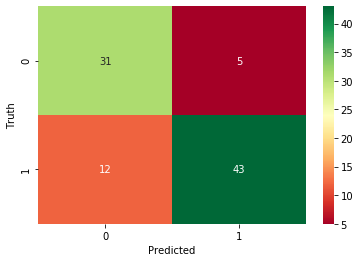

In [162]:
cConf_mat = confusion_matrix(cTestLabels, cPredLabels)

sn.heatmap(cConf_mat, annot=True, cmap='RdYlGn', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')